In [1]:
#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix
from sklearn.metrics import f1_score
from pprint import pprint
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix
from sklearn.metrics import f1_score
from time import time
from operator import itemgetter
from scipy.stats import randint
from sklearn.grid_search import GridSearchCV
from sklearn.grid_search import RandomizedSearchCV
from sklearn.cross_validation import  cross_val_score
import os
import subprocess
from sklearn.ensemble import AdaBoostClassifier
from time import time
from operator import itemgetter
from scipy.stats import randint
import pandas as pd
from sklearn.ensemble import BaggingClassifier
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier

filename = 'df_imputed_scaled_OHE_reduced.pkl'
df = pd.read_pickle(filename)
X = df[df.columns[:-1]]
y = pd.Series(df['heartdisease'])
train_X,test_X,train_y,test_y =train_test_split(X,y,test_size=0.33,shuffle = True, random_state=45)
pprint('--Data splitted done')

'--Data splitted done'


/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
def report(grid_scores, n_top=3):
    """Report top n_top parameters settings, default n_top=3.

    Args
    ----
    grid_scores -- output from grid or random search
    n_top -- how many to report, of top models

    Returns
    -------
    top_params -- [dict] top parameter settings found in
                  search
    """
    top_scores = sorted(grid_scores,
                        key=itemgetter(1),
                        reverse=True)[:n_top]
    for i, score in enumerate(top_scores):
        print("Model with rank: {0}".format(i + 1))
        print(("Mean validation score: "
               "{0:.3f} (std: {1:.3f})").format(
               score.mean_validation_score,
               np.std(score.cv_validation_scores)))
        print("Parameters: {0}".format(score.parameters))
        print("")

    return top_scores[0].parameters

In [3]:
def run_randomsearch(X, y, clf, para_dist, cv=5,
                     n_iter_search=100):
    """Run a random search for best Decision Tree parameters.

    Args
    ----
    X -- features
    y -- targets (classes)
    cf -- scikit-learn Decision Tree
    param_dist -- [dict] list, distributions of parameters
                  to sample
    cv -- fold of cross-validation, default 5
    n_iter_search -- number of random parameter sets to try,
                     default 20.

    Returns
    -------
    top_params -- [dict] from report()
    """
    random_search = RandomizedSearchCV(clf,
                        param_distributions=param_dist,
                        n_iter=n_iter_search, n_jobs= -1)

    start = time()
    random_search.fit(X, y)
    print(("\nRandomizedSearchCV took {:.2f} seconds "
           "for {:d} candidates parameter "
           "settings.").format((time() - start),
                               n_iter_search))

    top_params = report(random_search.grid_scores_, 3)
    return  top_params

In [4]:
pprint('-- Model Logistic Regression')
model_Logistic_Regression = LogisticRegression(penalty= 'l2', C = 1, solver = 'lbfgs')
pprint('-- Model Decision Tree')
model_Decision_Tree =DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=10, min_samples_leaf=10,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='random')


pprint('--------FINISH MODELS CREATED')

'-- Model Logistic Regression'
'-- Model Decision Tree'
'--------FINISH MODELS CREATED'


In [7]:
# dict of parameter list/distributions to sample
from sklearn.model_selection import KFold,StratifiedKFold #for K-fold cross validation

kfold = StratifiedKFold(n_splits=10, random_state=22) # k=10, split the data into 10 equal parts
n_estimators_search=list(range(100,1100,100))
range_learning_rate = np.logspace(-5, 2, 8)
min_samples_split = [2, 5, 10]
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

max_features = ['auto', 'sqrt']

param_dist={'n_estimators':n_estimators_search,
           'max_depth':max_depth,
           'min_samples_leaf':randint(1,10),
           'learning_rate': range_learning_rate,
           'max_features': max_features,
           }

pprint('----Random Search Decision Tree\n')
gradientBoosting_DT = GradientBoostingClassifier(random_state = 34)
DT_rs = run_randomsearch(X, y, gradientBoosting_DT, param_dist, cv=kfold,
                         n_iter_search=10)





'----Random Search Decision Tree\n'

RandomizedSearchCV took 10.56 seconds for 10 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.787 (std: 0.023)
Parameters: {'learning_rate': 0.001, 'n_estimators': 900, 'max_features': 'sqrt', 'min_samples_leaf': 9, 'max_depth': 20}

Model with rank: 2
Mean validation score: 0.780 (std: 0.026)
Parameters: {'learning_rate': 0.001, 'n_estimators': 700, 'max_features': 'sqrt', 'min_samples_leaf': 8, 'max_depth': 60}

Model with rank: 3
Mean validation score: 0.763 (std: 0.013)
Parameters: {'learning_rate': 0.01, 'n_estimators': 900, 'max_features': 'sqrt', 'min_samples_leaf': 7, 'max_depth': None}



In [48]:

#gradientBoosting_DT = GradientBoostingClassifier(learning_rate =  0.001, n_estimators =  900, max_features =  'sqrt', min_samples_leaf = 9, max_depth=  20,random_state = 34)

gradientBoosting_DT = GradientBoostingClassifier(learning_rate=0.05, n_estimators=160,max_depth=5, min_samples_split=600, min_samples_leaf=30, subsample=0.85, random_state=10,max_features = 3)





In [5]:






from sklearn.model_selection import KFold, StratifiedKFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score, cross_validate #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
from sklearn.metrics import recall_score, f1_score, precision_score, accuracy_score
from sklearn.metrics.scorer import make_scorer
from IPython.display import display, HTML


scoring = {'precision': make_scorer(precision_score),
           'recall': make_scorer(recall_score),
           'F-score': make_scorer( f1_score),
           'accuracy': make_scorer(accuracy_score)}

kfold = StratifiedKFold(n_splits=10, random_state=1) # k=10, split the data into 10 equal parts

classifiers=['gradientBoosting_Tuned']
#models=[gradientBoosting_DT]
gbm_tuned_1 = GradientBoostingClassifier(learning_rate=0.005, n_estimators=1600,max_depth=5, min_samples_split=600, min_samples_leaf=30, subsample=0.85, random_state=10,max_features = 3)
models=[gbm_tuned_1]


fit_time = []
score_time = []

test_accuracy = []
test_accuracy_total = []

test_accuracy_std = []
train_accuracy = []
train_accuracy_total = []
train_accuracy_std = []


test_F_score = []
test_F_score_total = []


test_F_score_std = []
train_F_score = []
train_F_score_total = []

train_F_score_std = []


test_precision = []
test_precision_std = []
train_precision = []
train_precision_std = []


test_recall = []
test_recall_std = []
train_recall = []
train_recall_std = []









for i in models:
    model = i
    scores = cross_validate(model,X,y, cv = kfold, scoring = scoring, return_train_score=True)
    fit_time.append(scores['fit_time'].mean())
    score_time.append(scores['score_time'].mean())
    
    test_accuracy.append(scores['test_accuracy'].mean())
    test_accuracy_total.append(scores['test_accuracy'])
    
    test_accuracy_std.append(scores['test_accuracy'].std())
    train_accuracy.append(scores['train_accuracy'].mean())
    train_accuracy_total.append(scores['train_accuracy'])
                          
    train_accuracy_std.append(scores['train_accuracy'].std())
    
    test_F_score.append(scores['test_F-score'].mean())
    test_F_score_total.append(scores['test_F-score'])
    
    test_F_score_std.append(scores['test_F-score'].std())
    train_F_score.append(scores['train_F-score'].mean())
    train_F_score_total.append(scores['train_F-score'])
                         
                         
    train_F_score_std.append(scores['train_F-score'].std())
    
    test_precision.append(scores['test_precision'].mean())
    test_precision_std.append(scores['test_precision'].std())
    train_precision.append(scores['train_precision'].mean())
    train_precision_std.append(scores['train_precision'].std())
    
    test_recall.append(scores['test_recall'].mean())
    test_recall_std.append(scores['test_recall'].std())
    train_recall.append(scores['train_recall'].mean())
    train_recall_std.append(scores['train_recall'].std())
    

    print('Model: ' + str(i))

sorted(scores.keys())     
dct_acc = {'Test_accuracy':test_accuracy,
               'Test_accuracy_std':test_accuracy_std,
               'Train_accuracy':train_accuracy,
               'Train_accuracy_std':train_accuracy_std, }
dct_Fscore = {'Test_F_score':test_F_score,
               'Test_F_score_std':test_F_score_std,
               'Train_F_score': train_F_score,
               'Train_F_score_std': train_F_score_std}
dct_precision = {'Test_precision': test_precision,
               'Test_precision_std': test_precision_std,
               'Train_precision': train_precision,
               'Train_precision_std': train_precision_std}
dct_recall = {'Test_Sensitivity': test_recall, 
               'Test_Sensitivity_std': test_recall_std,
               'Train_Sensitivity': train_recall,
               'Train_Sensitivity_std': train_recall_std}
dct_time = {'Fit_time': fit_time, 'Scoring Time':score_time}

metrics_acc=pd.DataFrame(dct_acc,index=classifiers)       
metrics_Fsc = pd.DataFrame(dct_Fscore,index=classifiers)
metrics_precision = pd.DataFrame(dct_precision,index=classifiers) 
metrics_recall = pd.DataFrame(dct_recall,index=classifiers)
metrics_time = pd.DataFrame(dct_time,index=classifiers)
           
display(metrics_acc)
display(metrics_Fsc)
display(metrics_precision)
display(metrics_recall)
display(metrics_time)




Model: GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.005, loss='deviance', max_depth=5,
              max_features=3, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=30, min_samples_split=600,
              min_weight_fraction_leaf=0.0, n_estimators=1600,
              presort='auto', random_state=10, subsample=0.85, verbose=0,
              warm_start=False)


,Test_accuracy,Test_accuracy_std,Train_accuracy,Train_accuracy_std
gradientBoosting_Tuned,0.790104,0.061772,0.811833,0.009396


,Test_F_score,Test_F_score_std,Train_F_score,Train_F_score_std
gradientBoosting_Tuned,0.8136,0.046531,0.832701,0.008082


,Test_precision,Test_precision_std,Train_precision,Train_precision_std
gradientBoosting_Tuned,0.814557,0.07785,0.819544,0.010056


,Test_Sensitivity,Test_Sensitivity_std,Train_Sensitivity,Train_Sensitivity_std
gradientBoosting_Tuned,0.823451,0.078784,0.846319,0.007305


,Fit_time,Scoring Time
gradientBoosting_Tuned,0.908618,0.008302


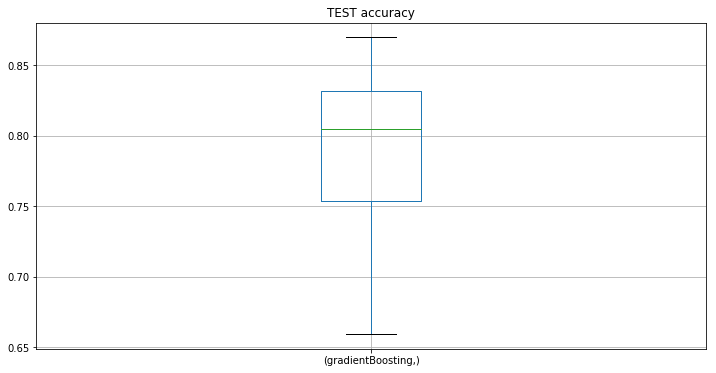

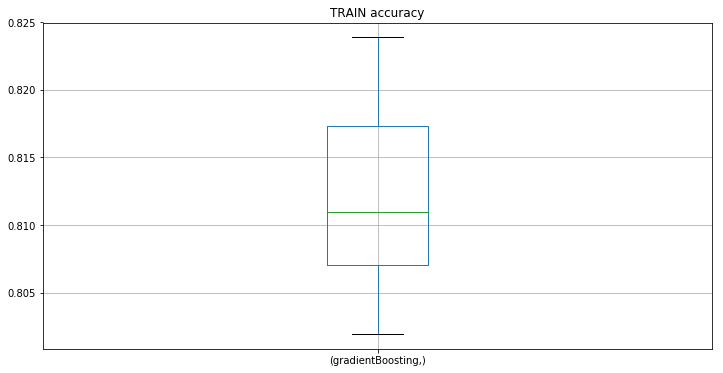

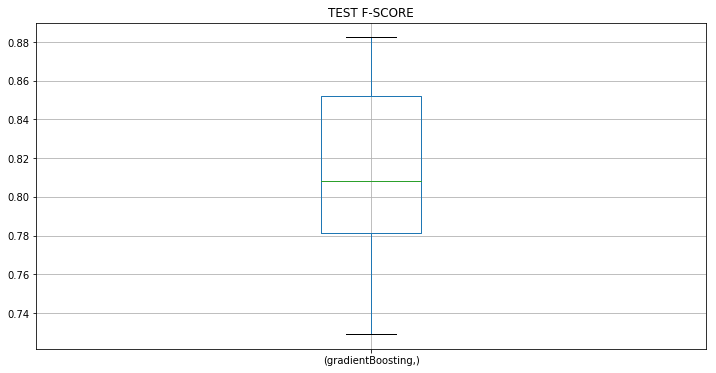

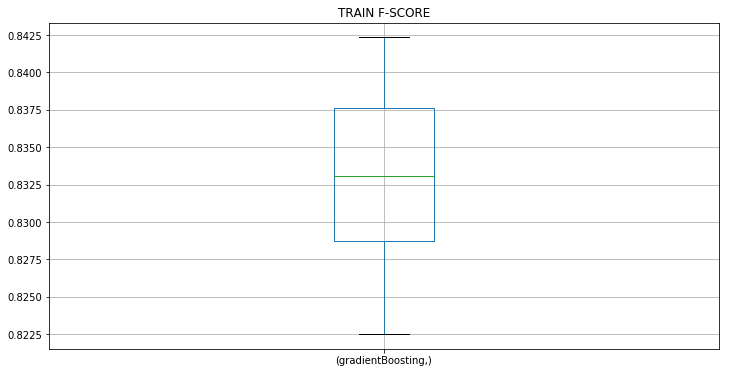

In [50]:
plt.figure(figsize=(12,6))
plt.title('TEST accuracy')
box_test_accuracy=pd.DataFrame(test_accuracy_total, index=[classifiers])
box_test_accuracy.T.boxplot()
plt.show()
plt.figure(figsize=(12,6))
plt.title('TRAIN accuracy')
box_train_accuracy=pd.DataFrame(train_accuracy_total,index=[classifiers])
box_train_accuracy.T.boxplot()
plt.show()
plt.figure(figsize=(12,6))
plt.title('TEST F-SCORE')
box_test_F_score=pd.DataFrame(test_F_score_total,index=[classifiers])
box_test_F_score.T.boxplot()
plt.show()
plt.figure(figsize=(12,6))
plt.title('TRAIN F-SCORE')
box_train_F_score=pd.DataFrame(train_F_score_total,index=[classifiers])
box_train_F_score.T.boxplot()
plt.show()
plt.show()

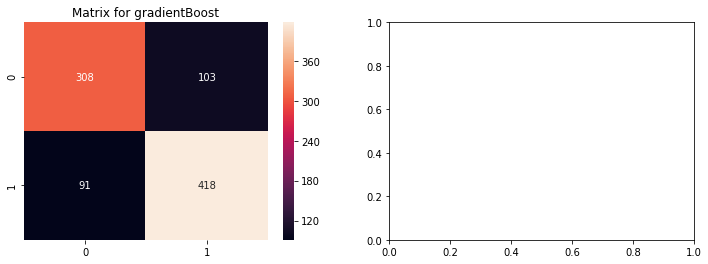

In [10]:
f,ax=plt.subplots(1,2,figsize=(12,4))
gbm_tuned_1 = GradientBoostingClassifier(learning_rate=0.01, n_estimators=800,max_depth=5, min_samples_split=600, min_samples_leaf=30, subsample=0.85, random_state=10,max_features = 3)
y_pred = cross_val_predict(gbm_tuned_1,X,y,cv=10)
sns.heatmap(confusion_matrix(y,y_pred),ax=ax[0],annot=True,fmt='2.0f')
ax[0].set_title('Matrix for gradientBoost')

plt.show()

[Fold 1/2]
TRAIN: [367 368 369 370 372 374 376 378 380 381 383 384 386 390 392 393 394 395
 397 399 400 401 402 404 408 409 410 411 412 413 415 416 417 421 424 425
 427 428 429 430 431 432 433 437 439 440 446 448 449 450 451 453 454 455
 456 457 460 462 465 466 467 468 471 472 473 474 475 476 477 481 482 483
 485 487 488 490 492 494 495 496 497 498 499 500 501 503 504 505 506 507
 508 509 510 512 516 517 519 521 522 523 526 527 528 530 532 533 534 535
 536 537 538 539 544 547 549 556 557 559 560 561 562 563 564 565 569 571
 573 574 575 577 578 579 582 583 584 586 587 588 589 590 591 592 593 594
 595 596 603 608 609 610 611 612 613 614 615 616 617 618 619 620 621 622
 623 624 625 626 627 628 629 630 631 632 633 634 635 636 637 638 639 640
 641 642 643 644 645 646 647 648 649 650 651 652 653 654 655 656 657 658
 659 660 661 662 663 664 665 666 667 668 669 670 671 672 673 674 675 676
 677 678 679 680 681 682 683 684 685 686 687 688 689 690 691 692 693 694
 695 696 697 698 699 700 701 702 

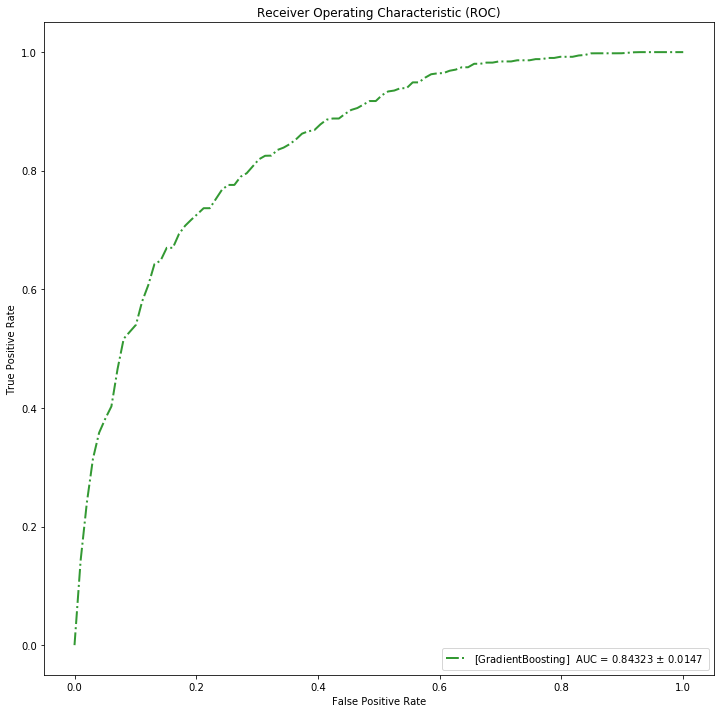

,AUC Mean,std
GradientBoosting,0.843232,0.014725


In [69]:
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold

#gbm_tuned_1 = GradientBoostingClassifier(learning_rate=0.01, n_estimators=800,max_depth=5, min_samples_split=600, min_samples_leaf=30, subsample=0.85, random_state=10,max_features = 3)
gbm_tuned_rs = GradientBoostingClassifier(learning_rate=0.05, n_estimators=80,max_depth=9, min_samples_split=200, min_samples_leaf=60, subsample=0.9, random_state=10,max_features = 11)
models = [    
    
    {
        'label' : 'GradientBoosting',
        'model': gbm_tuned_rs, 
        'color': 'green',
        'linestyle': '-.',
        'markers': ''
    },

]

# #############################################################################
# Classification and ROC analysis
random_state = np.random.RandomState(0)
# Run classifier with cross-validation and plot ROC curves
splits = 2
cv = StratifiedKFold(n_splits=splits)



tprs = []
aucs = []

mean_fpr = np.linspace(0, 1, 100)

aucs_mean = []
labels = []
stds = []


   


plt.figure(figsize=(12,12))
for m in models:
    i = 0
    for i,(train_index, test_index) in enumerate(kfold.split(X, y)):
        print('[Fold %d/%d]' % (i + 1, splits))
        print("TRAIN:", train_index, "\nTEST:", test_index)
        train_X = X.iloc[train_index]
        train_y = y.iloc[train_index]
        test_X = X.iloc[test_index]
        test_y = y.iloc[test_index]
        
        
        probas_ = m['model'].fit(train_X, train_y).predict_proba(test_X)
        # Compute ROC curve and area the curve
        fpr, tpr, thresholds = roc_curve(test_y, probas_[:, 1])
        tprs.append(interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        print('this is fpr: ' + str(fpr) + '\n')
        print('this is tpr: ' + str(tpr) + '\n')
        print('this is AUC: ' + str(roc_auc) + '\n')
        
        aucs.append(roc_auc)
        #plt.plot(fpr, tpr, lw=1, alpha=0.3,
        #         label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

        i += 1
    #plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
    #         label='Luck', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
   
    std_auc = np.std(aucs)
    

    plt.plot(mean_fpr, mean_tpr, color= m['color'], linestyle = m['linestyle'], marker= m['markers'],
             label=r'[%s]  AUC = %0.5f $\pm$ %0.4f ' % (m['label'] ,mean_auc, std_auc),
             lw=2, alpha=.8)
    
   
    aucs_mean.append(mean_auc)
    stds.append(std_auc)
    labels.append(m['label']) 

    
   



    #plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                    # label=r'$\pm$ 1 std. dev.')

    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")

plt.show()

AUCs=pd.DataFrame({'AUC Mean':aucs_mean, 'std':stds },index = labels)       
AUCs




In [61]:
X.iloc[train_index]

,age,sex_0,sex_1,cp_1,cp_3,cp_4,trestbps,chol,restecg,thalach,exang_0,exang_1,oldpeak
367,-0.372721,1.0,0.0,0.0,0.0,0.0,-1.204316,-0.865182,0.0,0.304475,1.0,0.0,-0.839770
368,-1.752828,1.0,0.0,0.0,0.0,0.0,-0.662458,0.254197,0.0,-0.291594,1.0,0.0,-0.839770
369,-0.903531,1.0,0.0,0.0,0.0,1.0,-0.012227,0.968284,0.0,0.264737,1.0,0.0,-0.839770
370,-2.283638,0.0,1.0,0.0,0.0,0.0,-1.204316,-0.421291,0.0,1.854254,1.0,0.0,-0.839770
372,-1.009693,0.0,1.0,0.0,0.0,1.0,0.963118,3.187743,0.0,1.297923,1.0,0.0,-0.839770
374,-1.009693,0.0,1.0,0.0,0.0,0.0,-0.120599,-0.614287,0.0,-0.092904,1.0,0.0,-0.839770
376,-1.009693,1.0,0.0,0.0,0.0,1.0,-0.662458,-0.556388,1.0,-0.887663,1.0,0.0,-0.839770
378,-0.797369,0.0,1.0,0.0,1.0,0.0,0.963118,-1.617869,0.0,-0.847925,1.0,0.0,-0.839770
380,-1.965152,1.0,0.0,0.0,0.0,1.0,0.421259,-1.540670,0.0,0.503165,1.0,0.0,-0.839770
381,-0.160397,0.0,1.0,0.0,0.0,0.0,0.421259,-2.833746,0.0,0.026309,0.0,1.0,-0.839770


In [97]:
#Import libraries:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm
from sklearn import cross_validation, metrics   #Additional scklearn functions
from sklearn.grid_search import GridSearchCV   #Perforing grid search
from sklearn.model_selection import StratifiedKFold
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
from IPython.display import display, HTML
rcParams['figure.figsize'] = 12, 4
aucs = []
train_cv_scores = []
test_cv_scores = []
auc_all_train = []
auc_all_test = []


tprs = []
aucs = []

mean_fpr = np.linspace(0, 1, 100)

aucs_mean = []
labels = []
stds = []


from sklearn.model_selection import KFold,StratifiedKFold #for K-fold cross validation
 # k=10, split the data into 10 equal parts


def modelfit(alg, X, y, performCV=True, printFeatureImportance=True, splits = 10):
    
    cv = StratifiedKFold(n_splits=splits)
     
    for i,(train_index, test_index) in enumerate(cv.split(X, y)):
        print('[Fold %d/%d]' % (i + 1, splits))
        #print("TRAIN:", train_index, "\nTEST:", test_index)
        train_X = X.iloc[train_index]
        train_y = y.iloc[train_index]
        test_X = X.iloc[test_index]
        test_y = y.iloc[test_index]
        
        
    
        test_probas_ = alg.fit(train_X, train_y).predict_proba(test_X)
        test_pred = alg.fit(train_X, train_y).predict(test_X)
        
        train_probas_ = alg.fit(train_X, train_y).predict_proba(train_X)
        train_pred = alg.fit(train_X, train_y).predict(train_X)
        
        
        # Compute ROC curve and area the curve
        fpr, tpr, thresholds = roc_curve(test_y, test_probas_[:, 1])
        tprs.append(interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        #print('this is fpr: ' + str(fpr) + '\n')
        #print('this is tpr: ' + str(tpr) + '\n')
        print('this is AUC: ' + str(roc_auc) + '\n')
        
        aucs.append(roc_auc)
    
        #Fit the algorithm on the data
        alg.fit(X, y)

        #Predict training set:
        dtrain_predictions = train_pred
        dtrain_predprob = train_probas_[:,1]
        #Predict test set:
        dtest_predictions = test_pred
        dtest_predprob = test_probas_[:,1]

        cv_score_train = metrics.accuracy_score(train_y, dtrain_predictions)
       
        cv_score_test = metrics.accuracy_score(test_y, dtest_predictions)
        auc_train = metrics.roc_auc_score(train_y, dtrain_predprob)
        auc_test = metrics.roc_auc_score(test_y, dtest_predprob)
        
        train_cv_scores.append(cv_score_train)
        test_cv_scores.append(cv_score_test)
        auc_all_train.append(auc_train)
        auc_all_test.append(auc_test)
        
   
    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = np.mean(aucs)
   
    std_auc = np.std(aucs)
    

    plt.plot(mean_fpr, mean_tpr, color= m['color'], linestyle = m['linestyle'], marker= m['markers'],
             label=r'[%s]  AUC = %0.5f $\pm$ %0.4f ' % (m['label'] ,mean_auc, std_auc),
             lw=2, alpha=.8)
    
    
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()
   
    
    #if performCV:
     #   print ("CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))

    #Print Feature Importance:
    if printFeatureImportance:
        feat_imp = pd.Series(alg.feature_importances_, X.columns).sort_values(ascending=False)
        feat_imp.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')
        plt.show()
    
    
    aucs_mean.append(mean_auc)
    stds.append(std_auc)
    labels.append(m['label']) 
    

    
    #Print model report:
    print("\nModel Report")
    print("Accuracy train (mean 10-cv): %0.5f $\pm$ %0.4f" %  (np.mean(train_cv_scores, axis=0), np.std(train_cv_scores, axis=0)))
    print("Accuracy test (mean 10-cv): %0.5f $\pm$ %0.4f" % (np.mean(test_cv_scores, axis=0), np.std(test_cv_scores, axis=0)))
    print("AUC Score (Train) (mean 10-cv): %0.5f $\pm$ %0.4f" % (np.mean(auc_all_train, axis=0), np.std(auc_all_train, axis=0)))
    print("AUC Score (Test) (mean 10-cv): %0.5f $\pm$ %0.4f" %(np.mean(auc_all_test, axis=0), np.std(auc_all_test, axis=0)))
    
    AUCs=pd.DataFrame({'AUC Mean':aucs_mean, 'std':stds },index = labels)       
    display(AUCs)


[Fold 1/10]
this is AUC: 0.8590102707749767

[Fold 2/10]
this is AUC: 0.8866571018651362

[Fold 3/10]
this is AUC: 0.8010521281683405

[Fold 4/10]
this is AUC: 0.8469631755141082

[Fold 5/10]
this is AUC: 0.8943089430894309

[Fold 6/10]
this is AUC: 0.9172644667623148

[Fold 7/10]
this is AUC: 0.9239598278335724

[Fold 8/10]
this is AUC: 0.9363940698230511

[Fold 9/10]
this is AUC: 0.7814442850310857

[Fold 10/10]
this is AUC: 0.7297560975609756



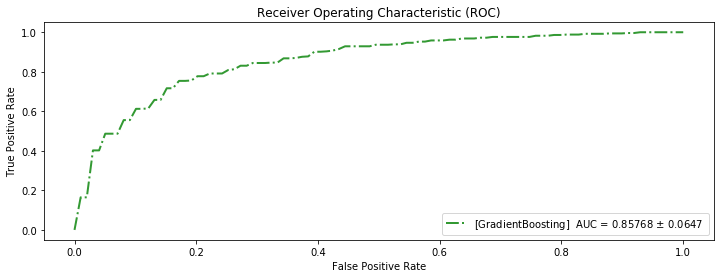

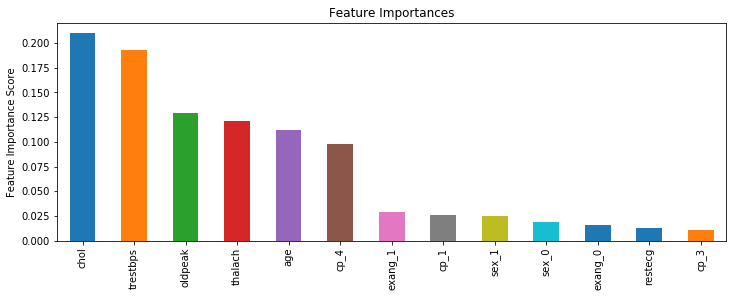


Model Report
Accuracy train (mean 10-cv): 0.89589 $\pm$ 0.0063
Accuracy test (mean 10-cv): 0.77270 $\pm$ 0.0669
AUC Score (Train) (mean 10-cv): 0.96467 $\pm$ 0.0042
AUC Score (Test) (mean 10-cv): 0.85768 $\pm$ 0.0647


,AUC Mean,std
GradientBoosting,0.857681,0.064669


In [98]:
#Choose all predictors except target & IDcols
predictors = X.columns
gbm0 = GradientBoostingClassifier(random_state=10)
modelfit(gbm0, X, y)

In [20]:
#Choose all predictors except target & IDcols
predictors = X.columns
param_test1 = {'n_estimators':np.arange(20,81,10)}
gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=500,min_samples_leaf=50,max_depth=8,max_features='sqrt',subsample=0.8,random_state=10),param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(X,y)

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=8,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=50, min_samples_split=500,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=10, subsample=0.8, verbose=0,
              warm_start=False),
       fit_params={}, iid=False, n_jobs=4,
       param_grid={'n_estimators': array([20, 30, 40, 50, 60, 70, 80])},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

In [21]:
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

([mean: 0.86120, std: 0.04068, params: {'n_estimators': 20},
  mean: 0.86482, std: 0.03747, params: {'n_estimators': 30},
  mean: 0.86444, std: 0.03874, params: {'n_estimators': 40},
  mean: 0.86915, std: 0.04428, params: {'n_estimators': 50},
  mean: 0.87052, std: 0.04529, params: {'n_estimators': 60},
  mean: 0.87177, std: 0.04555, params: {'n_estimators': 70},
  mean: 0.87254, std: 0.04632, params: {'n_estimators': 80}],
 {'n_estimators': 80},
 0.8725430779754955)

In [22]:
param_test2 = {'max_depth':np.arange(5,16,2), 'min_samples_split':np.arange(200,1001,200)}
gsearch2 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=80, max_features='sqrt', subsample=0.8, random_state=10), 
param_grid = param_test2, scoring='roc_auc',n_jobs=4,iid=False, cv=10)
gsearch2.fit(X,y)
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_

([mean: 0.85613, std: 0.06584, params: {'min_samples_split': 200, 'max_depth': 5},
  mean: 0.86500, std: 0.06373, params: {'min_samples_split': 400, 'max_depth': 5},
  mean: 0.87255, std: 0.05449, params: {'min_samples_split': 600, 'max_depth': 5},
  mean: 0.50000, std: 0.00000, params: {'min_samples_split': 800, 'max_depth': 5},
  mean: 0.50000, std: 0.00000, params: {'min_samples_split': 1000, 'max_depth': 5},
  mean: 0.85457, std: 0.06563, params: {'min_samples_split': 200, 'max_depth': 7},
  mean: 0.86353, std: 0.06227, params: {'min_samples_split': 400, 'max_depth': 7},
  mean: 0.87255, std: 0.05449, params: {'min_samples_split': 600, 'max_depth': 7},
  mean: 0.50000, std: 0.00000, params: {'min_samples_split': 800, 'max_depth': 7},
  mean: 0.50000, std: 0.00000, params: {'min_samples_split': 1000, 'max_depth': 7},
  mean: 0.85483, std: 0.06839, params: {'min_samples_split': 200, 'max_depth': 9},
  mean: 0.86337, std: 0.06332, params: {'min_samples_split': 400, 'max_depth': 9},
  

In [27]:
param_test3 = {'min_samples_split':np.arange(600,700,5), 'min_samples_leaf':np.arange(30,71,10)}
gsearch3 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=80,max_depth=5,max_features='sqrt', subsample=0.8, random_state=10), 
param_grid = param_test3, scoring='roc_auc',n_jobs=4,iid=False, cv=10)
gsearch3.fit(X,y)
gsearch3.grid_scores_, gsearch3.best_params_, gsearch3.best_score_

([mean: 0.87415, std: 0.05731, params: {'min_samples_leaf': 30, 'min_samples_split': 600},
  mean: 0.87434, std: 0.05783, params: {'min_samples_leaf': 30, 'min_samples_split': 605},
  mean: 0.87410, std: 0.05771, params: {'min_samples_leaf': 30, 'min_samples_split': 610},
  mean: 0.87387, std: 0.05782, params: {'min_samples_leaf': 30, 'min_samples_split': 615},
  mean: 0.87382, std: 0.05782, params: {'min_samples_leaf': 30, 'min_samples_split': 620},
  mean: 0.87382, std: 0.05711, params: {'min_samples_leaf': 30, 'min_samples_split': 625},
  mean: 0.87415, std: 0.05723, params: {'min_samples_leaf': 30, 'min_samples_split': 630},
  mean: 0.87453, std: 0.05685, params: {'min_samples_leaf': 30, 'min_samples_split': 635},
  mean: 0.87453, std: 0.05685, params: {'min_samples_leaf': 30, 'min_samples_split': 640},
  mean: 0.87453, std: 0.05685, params: {'min_samples_leaf': 30, 'min_samples_split': 645},
  mean: 0.87453, std: 0.05685, params: {'min_samples_leaf': 30, 'min_samples_split': 650},


Model Report
Accuracy : 0.8076
AUC Score (Train): 0.891266
CV Score : Mean - 0.8745298 | Std - 0.05685423 | Min - 0.7543902 | Max - 0.9385462


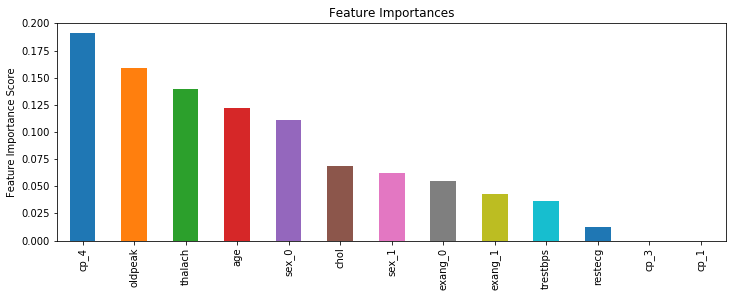

In [28]:
modelfit(gsearch3.best_estimator_, X, y)

In [31]:
param_test4 = {'max_features':np.arange(1,13,2)}
gsearch4 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=80,max_depth=5, min_samples_split=600, min_samples_leaf=30, subsample=0.8, random_state=10),
param_grid = param_test4, scoring='roc_auc',n_jobs=4,iid=False, cv=10)
gsearch4.fit(X,y)
gsearch4.grid_scores_, gsearch4.best_params_, gsearch4.best_score_

([mean: 0.86692, std: 0.05080, params: {'max_features': 1},
  mean: 0.87415, std: 0.05731, params: {'max_features': 3},
  mean: 0.87312, std: 0.05907, params: {'max_features': 5},
  mean: 0.87408, std: 0.06029, params: {'max_features': 7},
  mean: 0.87254, std: 0.06059, params: {'max_features': 9},
  mean: 0.87242, std: 0.06029, params: {'max_features': 11}],
 {'max_features': 3},
 0.874152900184464)

In [33]:
param_test5 = {'subsample':[0.6,0.7,0.75,0.8,0.85,0.9]}
gsearch5 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=80,max_depth=5, min_samples_split=600, min_samples_leaf=30, subsample=0.8, random_state=10,max_features = 3),
param_grid = param_test5, scoring='roc_auc',n_jobs=4,iid=False, cv=10)
gsearch5.fit(X,y)
gsearch5.grid_scores_, gsearch5.best_params_, gsearch5.best_score_

([mean: 0.50000, std: 0.00000, params: {'subsample': 0.6},
  mean: 0.50000, std: 0.00000, params: {'subsample': 0.7},
  mean: 0.87512, std: 0.05660, params: {'subsample': 0.75},
  mean: 0.87415, std: 0.05731, params: {'subsample': 0.8},
  mean: 0.87627, std: 0.05755, params: {'subsample': 0.85},
  mean: 0.87422, std: 0.05605, params: {'subsample': 0.9}],
 {'subsample': 0.85},
 0.8762744414839106)


Model Report
Accuracy : 0.8174
AUC Score (Train): 0.894584
CV Score : Mean - 0.8755718 | Std - 0.05814395 | Min - 0.7495122 | Max - 0.9423721


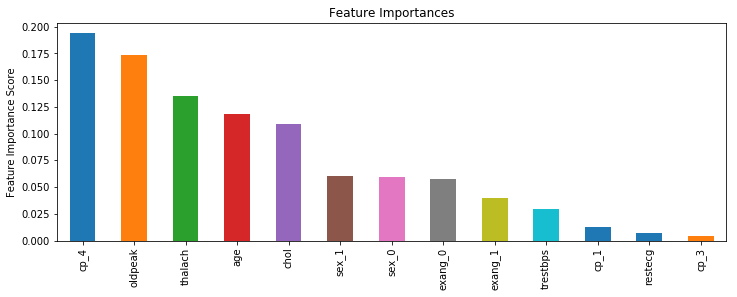

In [37]:
gbm_tuned_1 = GradientBoostingClassifier(learning_rate=0.05, n_estimators=160,max_depth=5, min_samples_split=600, min_samples_leaf=30, subsample=0.85, random_state=10,max_features = 3)



modelfit(gbm_tuned_1, X, y)


Model Report
Accuracy : 0.8141
AUC Score (Train): 0.894510
CV Score : Mean - 0.8741514 | Std - 0.05849318 | Min - 0.7492683 | Max - 0.9411765


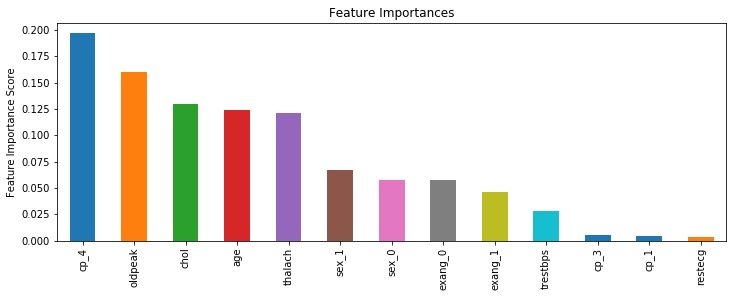

In [38]:
gbm_tuned_1 = GradientBoostingClassifier(learning_rate=0.01, n_estimators=800,max_depth=5, min_samples_split=600, min_samples_leaf=30, subsample=0.85, random_state=10,max_features = 3)



modelfit(gbm_tuned_1, X, y)


Model Report
Accuracy : 0.813
AUC Score (Train): 0.892535
CV Score : Mean - 0.8737441 | Std - 0.05780631 | Min - 0.7482927 | Max - 0.9416547


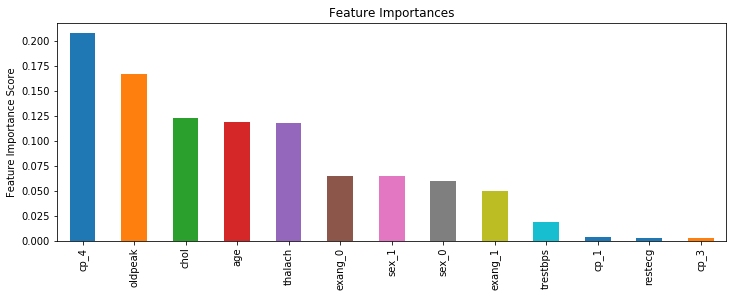

In [40]:
gbm_tuned_1 = GradientBoostingClassifier(learning_rate=0.01, n_estimators=700,max_depth=5, min_samples_split=600, min_samples_leaf=30, subsample=0.85, random_state=10,max_features = 3)
modelfit(gbm_tuned_1, X, y)

[Fold 1/10]
this is AUC: 0.8716153127917834

[Fold 2/10]
this is AUC: 0.9019607843137255

[Fold 3/10]
this is AUC: 0.8067910090865614

[Fold 4/10]
this is AUC: 0.8613103778096606

[Fold 5/10]
this is AUC: 0.9033955045432808

[Fold 6/10]
this is AUC: 0.9208512673362028

[Fold 7/10]
this is AUC: 0.9201339072214252

[Fold 8/10]
this is AUC: 0.9512195121951219

[Fold 9/10]
this is AUC: 0.8043998087039694

[Fold 10/10]
this is AUC: 0.7209756097560975



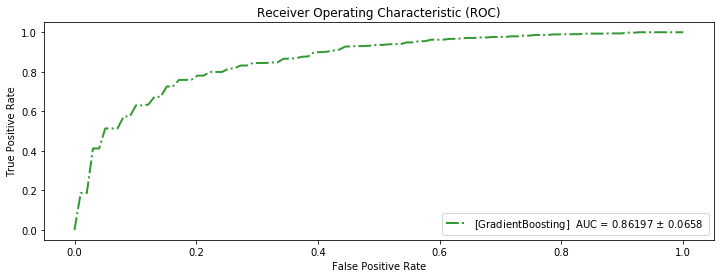

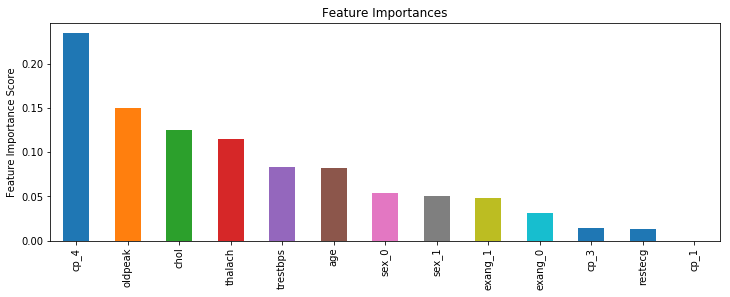


Model Report
Accuracy train (mean 10-cv): 0.86395 $\pm$ 0.0328
Accuracy test (mean 10-cv): 0.77542 $\pm$ 0.0685
AUC Score (Train) (mean 10-cv): 0.93874 $\pm$ 0.0265
AUC Score (Test) (mean 10-cv): 0.86197 $\pm$ 0.0658


In [96]:
#gbm_tuned_1 = GradientBoostingClassifier(learning_rate=0.005, n_estimators=1600,max_depth=5, min_samples_split=600, min_samples_leaf=30, subsample=0.85, random_state=10,max_features = 3)
gbm_tuned_1 = GradientBoostingClassifier(learning_rate=0.05, n_estimators=80,max_depth=9, min_samples_split=200, min_samples_leaf=60, subsample=0.9, random_state=10,max_features = 11)
modelfit(gbm_tuned_rs, X, y)

In [4]:
from sklearn.model_selection import KFold,StratifiedKFold #for K-fold cross validation
kfold = StratifiedKFold(n_splits=10, random_state=22) # k=10, split the data into 10 equal parts

gbm_tuned_1 = GradientBoostingClassifier(learning_rate=0.05, n_estimators=80,max_depth=9, min_samples_split=200, min_samples_leaf=60, subsample=0.9, random_state=10,max_features = 11)

param_dist = {'n_estimators':np.arange(20,81,10),
               'max_depth':np.arange(5,16,2), 
               'min_samples_split':np.arange(200,1001,200),
               'min_samples_leaf':np.arange(30,71,10),
               'max_features':np.arange(1,13,2),
               'subsample':[0.6,0.7,0.75,0.8,0.85,0.9],
               'learning_rate': [0.1,0.05,0.001]}
pprint('----Random Search GradientBoost\n')
gradientBoosting_DT = GradientBoostingClassifier(random_state = 34)
DT_rs = run_randomsearch(X, y, gradientBoosting_DT, param_dist, cv=kfold,
                         n_iter_search=5832)


'----Random Search GradientBoost\n'

RandomizedSearchCV took 88.68 seconds for 5832 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.793 (std: 0.018)
Parameters: {'subsample': 0.9, 'n_estimators': 80, 'max_depth': 11, 'max_features': 11, 'min_samples_leaf': 60, 'min_samples_split': 200, 'learning_rate': 0.05}

Model with rank: 2
Mean validation score: 0.791 (std: 0.014)
Parameters: {'subsample': 0.9, 'n_estimators': 70, 'max_depth': 11, 'max_features': 1, 'min_samples_leaf': 30, 'min_samples_split': 200, 'learning_rate': 0.1}

Model with rank: 3
Mean validation score: 0.791 (std: 0.021)
Parameters: {'subsample': 0.8, 'n_estimators': 40, 'max_depth': 15, 'max_features': 9, 'min_samples_leaf': 60, 'min_samples_split': 200, 'learning_rate': 0.1}



In [53]:
splits = 2
kfold = StratifiedKFold(n_splits=splits)

for i,(train_index, test_index) in enumerate(kfold.split(X, y)):
    print('[Fold %d/%d]' % (i + 1, splits))
    print("TRAIN:", train_index, "\nTEST:", test_index)
  

[Fold 1/2]
TRAIN: [367 368 369 370 372 374 376 378 380 381 383 384 386 390 392 393 394 395
 397 399 400 401 402 404 408 409 410 411 412 413 415 416 417 421 424 425
 427 428 429 430 431 432 433 437 439 440 446 448 449 450 451 453 454 455
 456 457 460 462 465 466 467 468 471 472 473 474 475 476 477 481 482 483
 485 487 488 490 492 494 495 496 497 498 499 500 501 503 504 505 506 507
 508 509 510 512 516 517 519 521 522 523 526 527 528 530 532 533 534 535
 536 537 538 539 544 547 549 556 557 559 560 561 562 563 564 565 569 571
 573 574 575 577 578 579 582 583 584 586 587 588 589 590 591 592 593 594
 595 596 603 608 609 610 611 612 613 614 615 616 617 618 619 620 621 622
 623 624 625 626 627 628 629 630 631 632 633 634 635 636 637 638 639 640
 641 642 643 644 645 646 647 648 649 650 651 652 653 654 655 656 657 658
 659 660 661 662 663 664 665 666 667 668 669 670 671 672 673 674 675 676
 677 678 679 680 681 682 683 684 685 686 687 688 689 690 691 692 693 694
 695 696 697 698 699 700 701 702 

SyntaxError: invalid syntax (<ipython-input-47-f2bb5b044cd4>, line 1)